In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings;warnings.simplefilter('ignore')
import matplotlib.pyplot as plt 
%matplotlib inline

large=22; med=16; small=12
params = {'axes.titlesize':large,
         'legend.fontsize':med,
         'figure.figsize':(16,10),
         'axes.labelsize':med,
         'axes.labelsize':med,
         'xtick.labelsize':med,
         'ytick.labelsize':med,
         'figure.titlesize':large}


plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

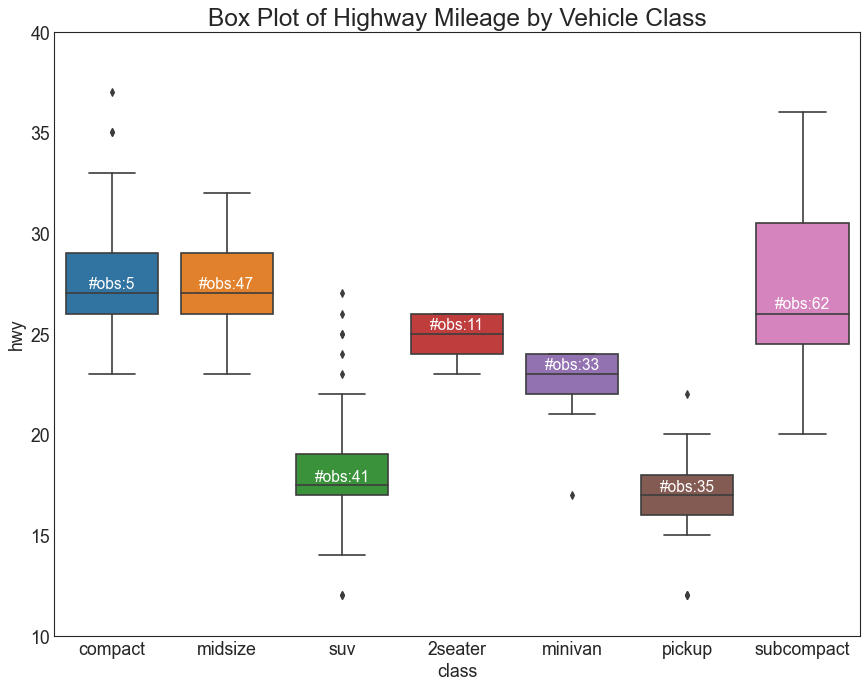

In [10]:
df = pd.read_csv('mpg_ggplot.csv')

#Draw Box Plot
plt.figure(figsize=(13,10), dpi=80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

#add objects inside boxes
def add_n_obs(df, group_col, y):
    median_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obj = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obj):
        plt.text(x, median_dict[xticklabel]*1.01, 
                 "#obs:"+str(n_ob),
                 horizontalalignment='center', fontdict={'size':14}, color='white') 
        
        
add_n_obs(df, group_col='class',y='hwy')     
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()
        